# Credit Score Classification

Dataset description
1. ID: Represents a unique identification of an entry
2. Customer_ID: Represents a unique identification of a person
3. Month: Represents the month of the year
4. Name: Represents the name of a person
5. Age: Represents the age of the person
6. SSN: Represents the social security number of a person
7. Occupation: Represents the occupation of the person
8. Annual_Income: Represents the annual income of the person
9. Monthly_Base_Salary: Represents the monthly base salary of a person
10. Num_Bank_Accounts: Represents the number of bank accounts a person holds
11. Num_Credit_Card: Represents the number of other credit cards held by a person
12. Interest_Rate: Represents the interest rate on credit card
13. Num_of_Loan: Represents the number of loans taken from the bank
14. Type_of_Loan: Represents the types of loan taken by a person
15. Delay_from_due_date: Represents the average number of days delayed from the payment date
16. Num_of_delayed_Payment: Represents the average number of payments delayed by a person
17. Changed_Credit_Limit: Represents the percentage change in credit card limit
18. Num_Credit_Inquiries: Represents the number of credit card inquiries
19. Credit_Mix: Represents the classification of the mix of credits
20. Outstanding_Debt: Represents the remaining debt to be paid (in USD)
21. Credit_Utilization_Ratio: Represents the utilization ratio of credit card
22. Credit_History_Age: Represents the age of credit history of the person
23. Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
24. Total_EMI_per_month: Represents the monthly EMI payments (in USD)
25. Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
26. Payment_Behaviour: Represents the payment behavior of the customer (in USD)
27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
28. Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

#### import relevant depandancies

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys
import warnings

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

sb.set_style('darkgrid')
sb.set()

warnings.simplefilter('ignore')

#### Load Dataset from Local Host Machine

In [106]:
test_df = pd.read_csv(r"D:\Open Classroom\Datasets\Credit score classification\test.csv")
train_df = pd.read_csv(r"D:\Open Classroom\Datasets\Credit score classification\train.csv")

In [107]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [108]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [109]:
print(f'Train dataset has {train_df.shape[0]} columns and {train_df.shape[1]} rows')
print(f'Test dataset has {test_df.shape[0]} columns and {test_df.shape[1]} rows')

Train dataset has 100000 columns and 28 rows
Test dataset has 50000 columns and 27 rows


In [110]:
def get_missing_no_columns(dataframe):
    missing_columns = (dataframe.isnull().sum())
    return missing_columns[missing_columns > 0]


In [111]:
print(get_missing_no_columns(train_df))

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


In [112]:
print(get_missing_no_columns(test_df))

Name                       5015
Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Num_of_Delayed_Payment     3498
Num_Credit_Inquiries       1035
Credit_History_Age         4470
Amount_invested_monthly    2271
Monthly_Balance             562
dtype: int64


Text(0.5, 1.0, 'Credit Distribution on Train Data')

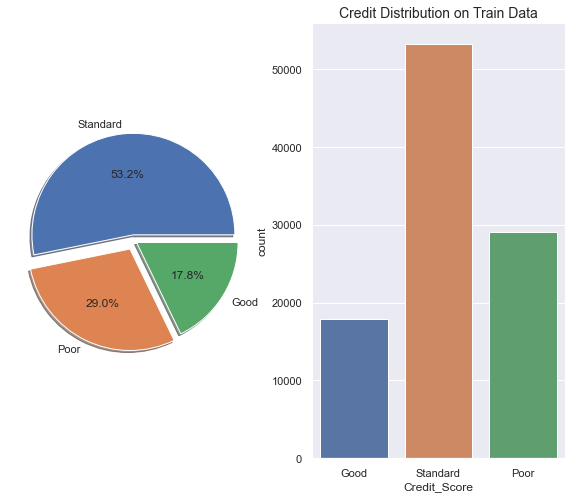

In [113]:
plt.figure(figsize = (10, 8))

plt.subplot(1,2,1)

label = train_df['Credit_Score'].value_counts().index
label_count = train_df['Credit_Score'].value_counts().values

plt.pie(x = label_count, labels=label, explode = [0.06, 0.09, 0.03], autopct='%1.1f%%', shadow = True)


plt.subplot(1,2,2)

sb.countplot(x = 'Credit_Score', data = train_df)
plt.title('Credit Distribution on Train Data', fontdict={'size':14})

#### Handle Missing Values

#### Drop unneccesary values

In [114]:
train_df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [115]:
def drop_unnecessary_columns(dataframe):
    unnecessary_columns = ['ID', 'Customer_ID', 'SSN', 'Name']
    return dataframe.drop(unnecessary_columns, axis = 1, inplace = True)

In [116]:
drop_unnecessary_columns(train_df)

In [117]:
for col in train_df.columns:
    print(col,' ', train_df[col].nunique())

Month   8
Age   1788
Occupation   16
Annual_Income   18940
Monthly_Inhand_Salary   13235
Num_Bank_Accounts   943
Num_Credit_Card   1179
Interest_Rate   1750
Num_of_Loan   434
Type_of_Loan   6260
Delay_from_due_date   73
Num_of_Delayed_Payment   749
Changed_Credit_Limit   4384
Num_Credit_Inquiries   1223
Credit_Mix   4
Outstanding_Debt   13178
Credit_Utilization_Ratio   100000
Credit_History_Age   404
Payment_of_Min_Amount   3
Total_EMI_per_month   14950
Amount_invested_monthly   91049
Payment_Behaviour   7
Monthly_Balance   98792
Credit_Score   3


In [118]:
for col in train_df.columns:
    print(col,'\t', train_df[col].isnull().sum())

Month 	 0
Age 	 0
Occupation 	 0
Annual_Income 	 0
Monthly_Inhand_Salary 	 15002
Num_Bank_Accounts 	 0
Num_Credit_Card 	 0
Interest_Rate 	 0
Num_of_Loan 	 0
Type_of_Loan 	 11408
Delay_from_due_date 	 0
Num_of_Delayed_Payment 	 7002
Changed_Credit_Limit 	 0
Num_Credit_Inquiries 	 1965
Credit_Mix 	 0
Outstanding_Debt 	 0
Credit_Utilization_Ratio 	 0
Credit_History_Age 	 9030
Payment_of_Min_Amount 	 0
Total_EMI_per_month 	 0
Amount_invested_monthly 	 4479
Payment_Behaviour 	 0
Monthly_Balance 	 1200
Credit_Score 	 0


In [119]:
train_df['Monthly_Inhand_Salary'] = train_df['Monthly_Inhand_Salary'].fillna(train_df['Monthly_Inhand_Salary'].median())

In [120]:
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna(train_df['Type_of_Loan'].mode([0]))

In [121]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].str.rstrip('_')
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].fillna(train_df['Num_of_Delayed_Payment'].median())
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(int).abs()